In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from collections import Counter

In [2]:
df= pd.read_csv(r"C:\Users\user\Downloads\Data Science\Dune Sales Data.csv")

In [3]:
df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,19-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00
1,20-Feb-16,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50
2,27-Feb-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00
3,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50
4,12-Mar-16,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67


In [4]:
df.tail()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34862,7-Feb-16,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,1160.0,985.50
34863,13-Mar-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2049.0,1583.00
34864,5-Apr-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,683.0,560.67
34865,30-Aug-15,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,2320.0,1568.00
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.shape

(34867, 12)

In [6]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34867 entries, 0 to 34866
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34867 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.2+ MB


In [8]:
#numerical analysis
df.describe()

,Customer_Age,Quantity,Unit_Cost,Unit_Price
count,34867.000000,34866.000000,34866.000000,34866.000000
mean,36.382683,2.002524,349.880567,389.232473
std,11.112813,0.813936,490.015846,525.319097
min,17.000000,1.000000,0.670000,0.670000
25%,28.000000,1.000000,45.000000,53.670000
50%,35.000000,2.000000,150.000000,179.000000
75%,44.000000,3.000000,455.000000,521.000000
max,87.000000,3.000000,3240.000000,5082.000000


In [9]:
#categorical analysis
df.describe(include=['object','bool'])

,Date,Customer,Sales Person,Customer_Gender,State,Product_Category,Sub_Category,Payment Option
count,34866,34866,34866,34866,34866,34866,34866,34866
unique,576,4,7,2,36,3,17,3
top,1-Mar-16,Low,Remota,F,Lagos,Accessories,Keyboard,Cash
freq,196,13041,6667,17439,10332,22534,11112,15911


In [10]:
#missing categories
#MCAR, MAR,MNAR
#1st step is to investigate

null_values=df.isnull().sum()
null_values



Date                1
Customer            1
Sales Person        1
Customer_Age        0
Customer_Gender     1
State               1
Product_Category    1
Sub_Category        1
Payment Option      1
Quantity            1
Unit_Cost           1
Unit_Price          1
dtype: int64

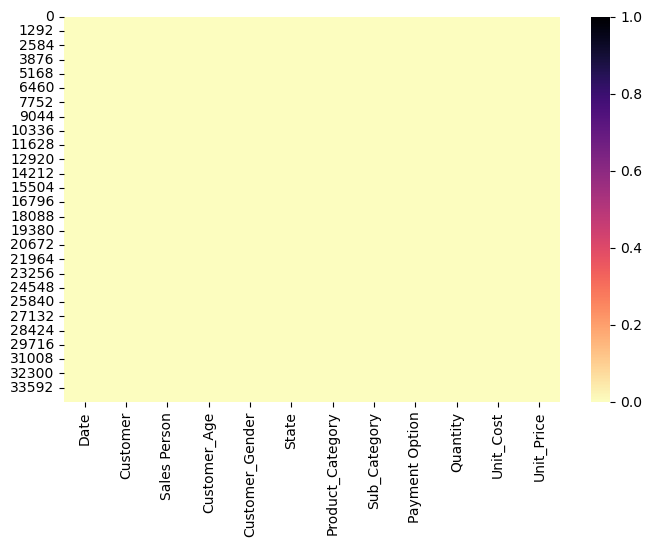

In [11]:
#Visualize Missing data
fig=plt.figure(figsize=(8,5))
sns.heatmap(df.isnull(), cbar=True, cmap="magma_r");

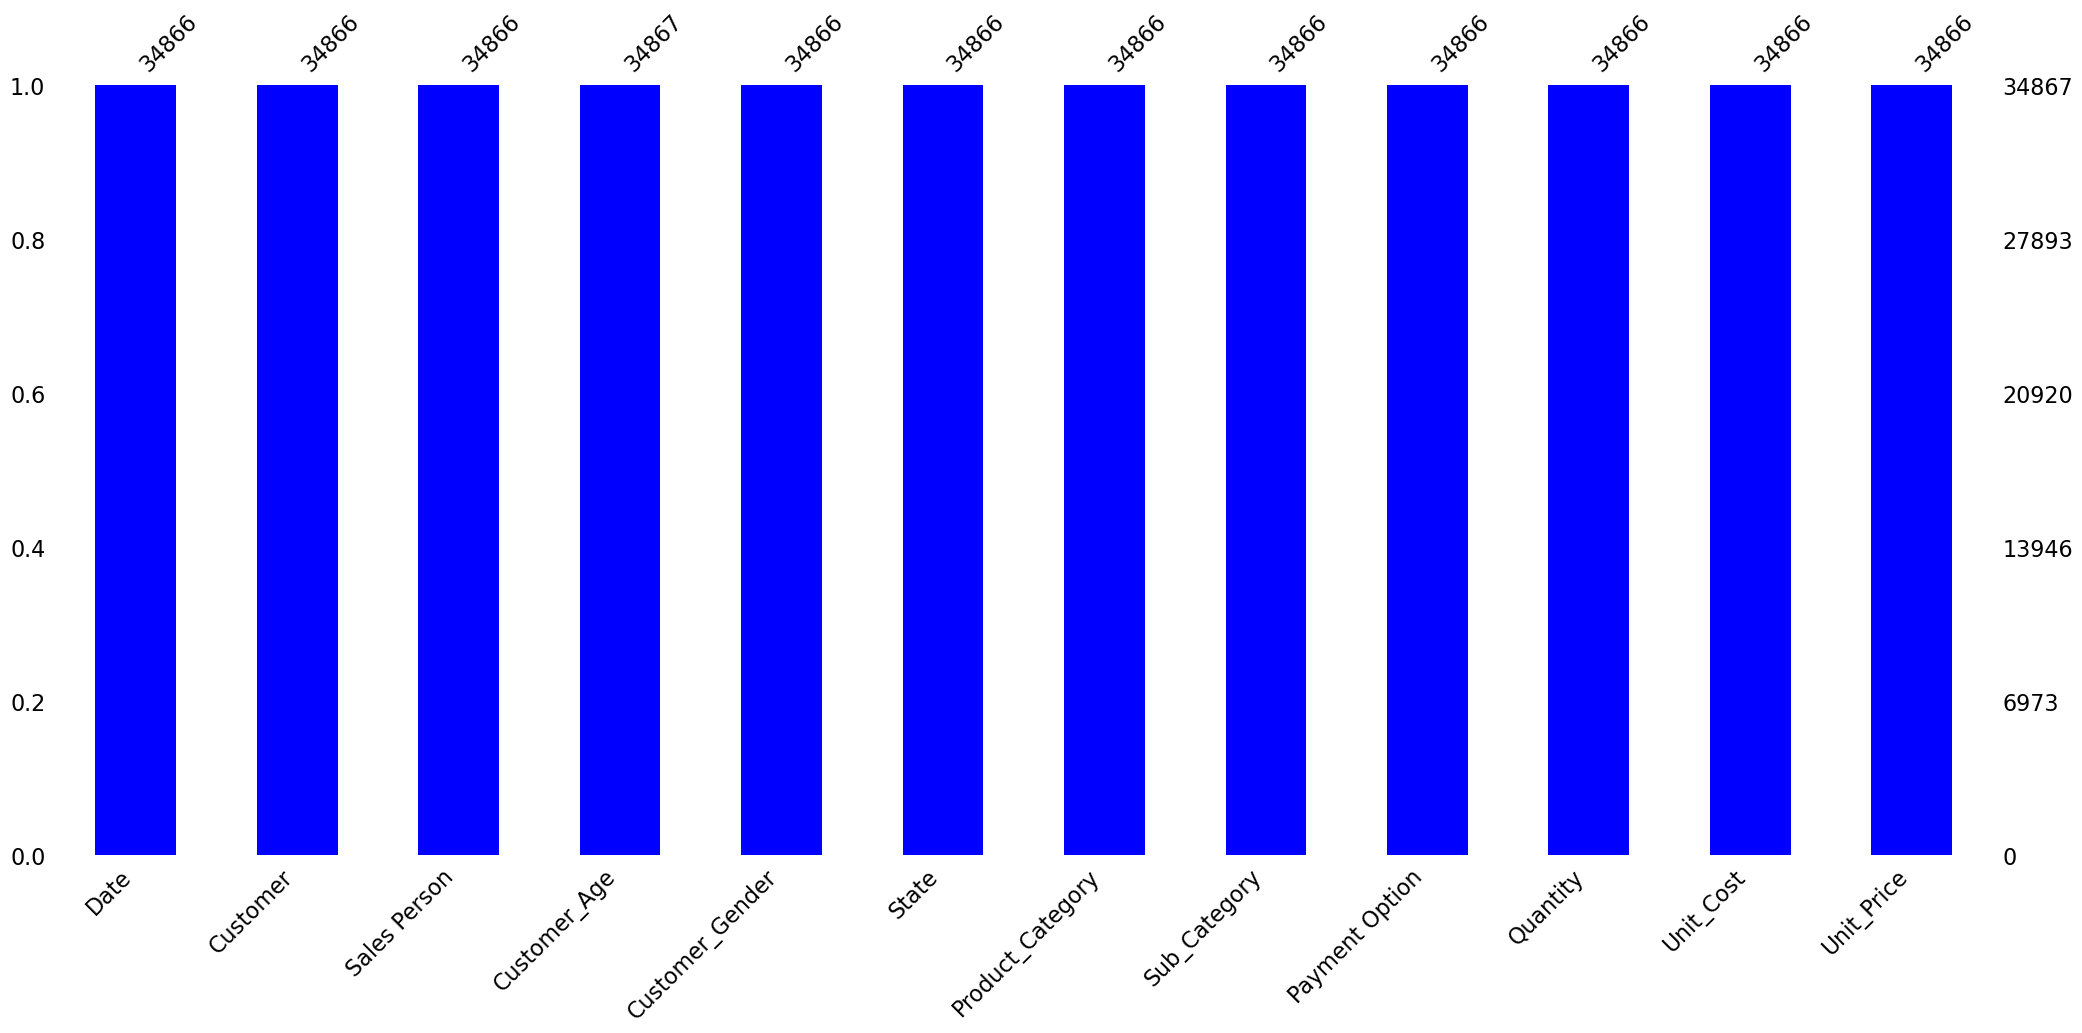

In [12]:
msno.bar(df,color='b');

In [13]:
df.isnull()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
34862,False,False,False,False,False,False,False,False,False,False,False,False
34863,False,False,False,False,False,False,False,False,False,False,False,False
34864,False,False,False,False,False,False,False,False,False,False,False,False
34865,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
#display where missing data is
df[df.isnull().any(axis=1)]

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price
34866,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
#drop the missing data because its an empty row and will not affect the data analysis
df.dropna(inplace=True)

In [16]:
#no more missing values
df.isnull().sum()

Date                0
Customer            0
Sales Person        0
Customer_Age        0
Customer_Gender     0
State               0
Product_Category    0
Sub_Category        0
Payment Option      0
Quantity            0
Unit_Cost           0
Unit_Price          0
dtype: int64

In [17]:
#date time analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34866 entries, 0 to 34865
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              34866 non-null  object 
 1   Customer          34866 non-null  object 
 2   Sales Person      34866 non-null  object 
 3   Customer_Age      34866 non-null  int64  
 4   Customer_Gender   34866 non-null  object 
 5   State             34866 non-null  object 
 6   Product_Category  34866 non-null  object 
 7   Sub_Category      34866 non-null  object 
 8   Payment Option    34866 non-null  object 
 9   Quantity          34866 non-null  float64
 10  Unit_Cost         34866 non-null  float64
 11  Unit_Price        34866 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 3.5+ MB


In [18]:

#converted the date column to a pd datetime object
df['Date']=pd.to_datetime(df['Date'])

C:\Users\user\AppData\Local\Temp\ipykernel_18604\282823315.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date']=pd.to_datetime(df['Date'])


In [19]:
#Extracted the year, month,quarter
df['year']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['month_name']=df['Date'].dt.month_name()
df['quarter']=df['Date'].dt.quarter

df.head()

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,2016,2,February,1
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,2016,2,February,1
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,2016,2,February,1
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,2016,3,March,1
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,2016,3,March,1


In [20]:
#categorize customer age into age groups

def age_group(x):
    if x <=25:
        return'<=24 Young Adult'
    elif x<=40:
        return '25-40 Adult'
    elif x<=50:
        return '41-50 Old Adult'
    else:
        return '>=51 Elder'
    
#created a new feature and applied the function
df['Age_group']= df['Customer_Age'].apply(age_group)
df.head()
    
    

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,Age_group
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.00,109.00,2016,2,February,1,25-40 Adult
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.50,28.50,2016,2,February,1,25-40 Adult
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,3.67,5.00,2016,2,February,1,25-40 Adult
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,87.50,116.50,2016,3,March,1,25-40 Adult
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,35.00,41.67,2016,3,March,1,25-40 Adult


In [21]:
#analyse profit/loss: cost, revenue/profit: new column

df['Cost']=df['Quantity']*df['Unit_Cost']
df['Revenue']=df['Quantity']*df['Unit_Price']
df['Profit']=df['Revenue']-df['Unit_Cost']

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,Unit_Cost,Unit_Price,year,month,month_name,quarter,Age_group,Cost,Revenue,Profit
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,80.0,109.0,2016,2,February,1,25-40 Adult,80.0,109.0,29.0
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,24.5,28.5,2016,2,February,1,25-40 Adult,49.0,57.0,32.5


In [22]:
#profit/loss grouping

def porl(x):
    if x>=0:
        return 'Profit'
    else:
        return 'Loss'
    
df['Profit_Label']=df['Profit'].apply(porl)

df.head(2)

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,Age_group,Cost,Revenue,Profit,Profit_Label
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.0,2016,2,February,1,25-40 Adult,80.0,109.0,29.0,Profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.5,2016,2,February,1,25-40 Adult,49.0,57.0,32.5,Profit


## Univariate Analysis

In [23]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'Age_group', 'Cost', 'Revenue', 'Profit', 'Profit_Label'],
      dtype='object')

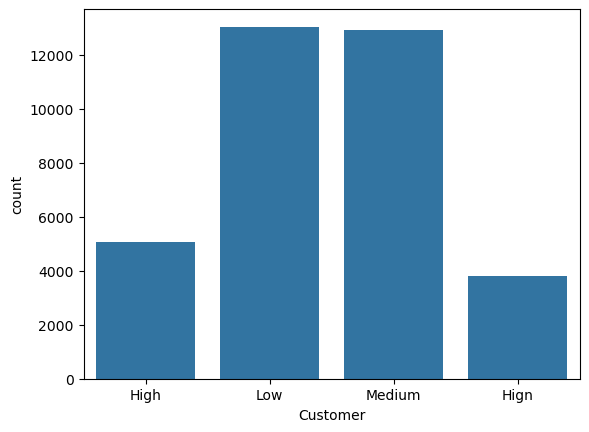

In [24]:
#how many customers belong to each customer spec
sns.countplot(x='Customer',data=df);
#inccorrect data (Hign) observed

In [25]:
#Investigate affecte columns
df[df['Customer']=='Hign']

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,Age_group,Cost,Revenue,Profit,Profit_Label
29770,2015-08-03,Hign,Derick,28,F,Lagos,Phones,IPhone,Cash,1.0,...,2136.00,2015,8,August,3,25-40 Adult,2295.00,2136.00,-159.00,Loss
29771,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,2.0,...,19.50,2015,8,August,3,25-40 Adult,35.00,39.00,21.50,Profit
29772,2015-08-04,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,18.67,2015,8,August,3,25-40 Adult,50.01,56.01,39.34,Profit
29773,2015-08-10,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,1.0,...,69.00,2015,8,August,3,25-40 Adult,60.00,69.00,9.00,Profit
29774,2015-08-25,Hign,Derick,28,F,Lagos,Accessories,Keyboard,Cash,3.0,...,47.00,2015,8,August,3,25-40 Adult,125.01,141.00,99.33,Profit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33581,2016-06-05,Hign,Chinazam,40,F,Lagos,Accessories,Phone Charger,Online,1.0,...,905.00,2016,6,June,2,25-40 Adult,720.00,905.00,185.00,Profit
33582,2016-06-14,Hign,Chinazam,40,M,Abia,Clothing,Jerseys,Online,1.0,...,1638.00,2016,6,June,2,25-40 Adult,1150.00,1638.00,488.00,Profit
33583,2016-06-19,Hign,Chinazam,40,M,Abia,Accessories,Phone Charger,Online,3.0,...,1405.33,2016,6,June,2,25-40 Adult,3240.00,4215.99,3135.99,Profit
33584,2016-06-19,Hign,Chinazam,40,M,Abia,Clothing,Jerseys,Online,2.0,...,511.00,2016,6,June,2,25-40 Adult,900.00,1022.00,572.00,Profit


### Categorical Data Visualization

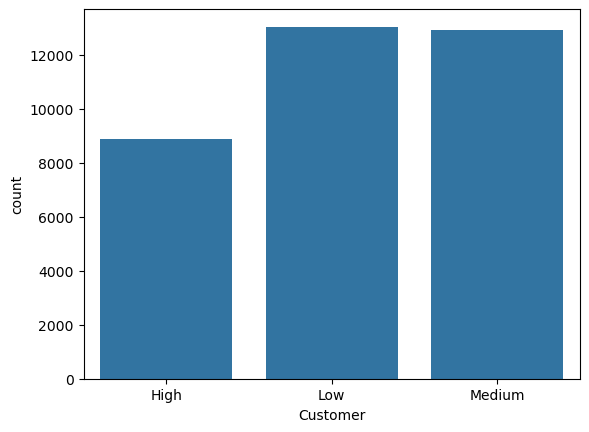

In [26]:
#correct the spelling of HIGN
df.loc[df['Customer']== 'Hign', 'Customer']='High'

sns.countplot(x='Customer',data=df);

In [27]:
df['Customer'].value_counts()

Customer
Low       13041
Medium    12926
High       8899
Name: count, dtype: int64

# Narration of Observation


In the realm of sales analysis, a comprehensive examination of customer segmentation has revealed intriguing insights into the distribution of clientele. The data illustrates a breakdown of customers into distinct categories based on their engagement and transactional behavior.

At the forefront, we observe a substantial portion of customers falling into the "Low" category, numbering 13,041. These are individuals who engage with the company at a relatively modest level, reflecting lower transactional volumes or less frequent interactions.

In close proximity, the "Medium" category emerges with 12,926 customers. This group signifies a moderate level of engagement, indicating a more consistent and involved customer base compared to the "Low" category.

Meanwhile, the "High" category showcases 8,899 customers, representing a segment of clientele characterized by robust engagement and potentially significant transactional activity. These high-value customers likely contribute significantly to the overall sales performance, warranting targeted strategies for retention and further cultivation of their business.

This nuanced segmentation not only provides a snapshot of the customer landscape but also serves as a foundational element for crafting tailored marketing approaches and customer relationship management strategies. Understanding the distribution across these categories enables the company to align its efforts with the diverse needs and preferences of its customer base, fostering a more responsive and customer-centric approach to sales and business development.

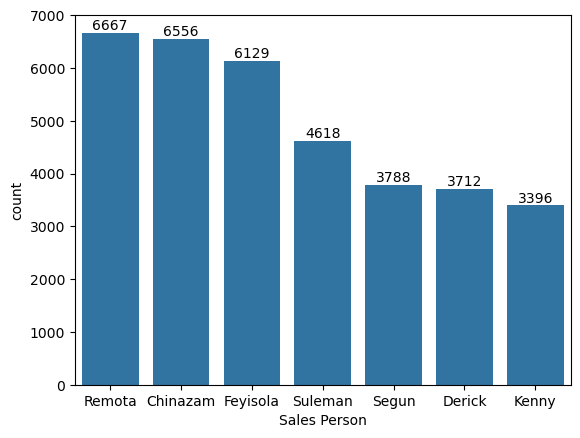

In [28]:
#sales person- How many transactions by sales person
ax=sns.countplot(x=df['Sales Person'],order=df['Sales Person'].value_counts(ascending=False).index)
values=df['Sales Person'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

In [29]:
df['Sales Person'].value_counts()

Sales Person
Remota      6667
Chinazam    6556
Feyisola    6129
Suleman     4618
Segun       3788
Derick      3712
Kenny       3396
Name: count, dtype: int64

# Narration of Observation

In the dynamic realm of sales at Dune LTD, a recent comprehensive sales analysis has illuminated the outstanding contributions of our sales team. The data reveals the individual achievements of each salesperson, providing a clear snapshot of their performance during the specified period.

Topping the charts is Remota, whose remarkable efforts have resulted in an impressive sales figure of 6667. Hot on Remota's heels is Chinazam, securing the second position with 6556 in sales. Feyisola follows closely behind, demonstrating a strong performance with 6129 in sales.

Suleman, Segun, Derick, and Kenny have also exhibited commendable efforts in driving sales for Dune LTD. Suleman achieved 4618 in sales, followed by Segun with 3788, Derick with 3712, and Kenny with 3396.

This detailed breakdown not only recognizes the outstanding achievements of individual salespersons but also provides valuable insights into the distribution of sales efforts within the team. As Dune LTD continues to thrive, this data serves as a foundation for acknowledging and celebrating the hard work and dedication of our sales team, fostering a culture of recognition and excellence within the organization.

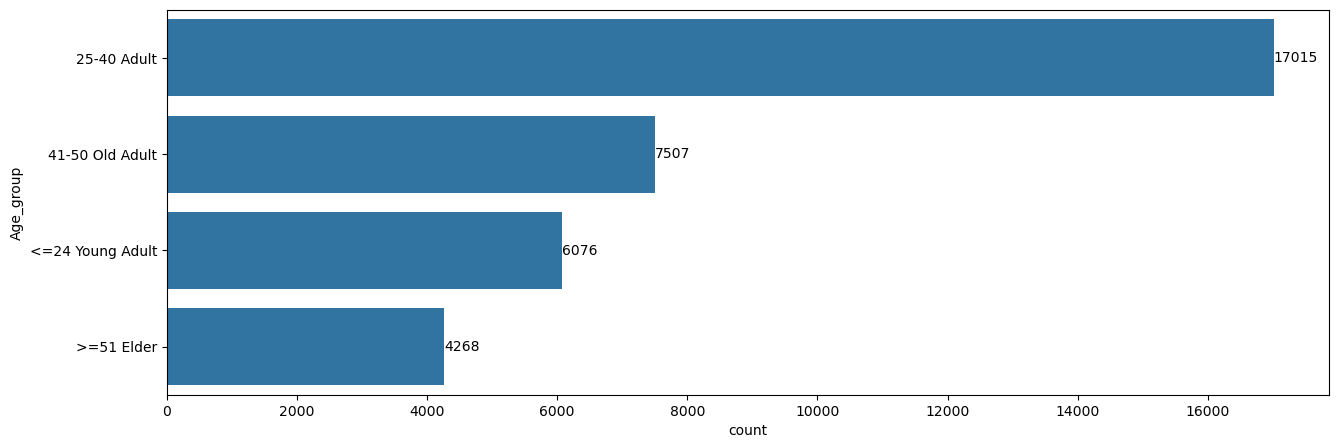

In [30]:
#Total transactions by customer age group
plt.figure(figsize=(15,5))
ax=sns.countplot(y=df['Age_group'],order=df['Age_group'].value_counts(ascending=False).index)
values=df['Age_group'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

In [31]:
df['Age_group'].value_counts()

Age_group
25-40 Adult         17015
41-50 Old Adult      7507
<=24 Young Adult     6076
>=51 Elder           4268
Name: count, dtype: int64

### Narration of Observation
In delving into the sales analysis for Dune LTD, a meticulous examination of profit generation across different age groups was conducted. The data revealed distinct patterns, showcasing the financial impact of varying age demographics on the company's overall profitability.

The age groups were categorized as follows:
- **25-40 Adult:** This segment emerged as the most lucrative, contributing a substantial profit of 17,016 units. The robust financial performance of this demographic underscored its significance in driving revenue for Dune LTD.

- **41-50 Old Adult:** The next age bracket, comprising individuals between 41 and 50 years old, demonstrated a commendable contribution to the company's profit, amounting to 7,507 units. Their purchasing behavior and engagement proved to be a noteworthy factor in the overall financial success of Dune LTD.

- **<=24 Young Adult:** The younger demographic, encompassing individuals aged 24 and below, also played a significant role, contributing 6,076 units to the company's profit. This indicated a promising market share among the younger audience for Dune LTD.

- **>=51 Elder:** The elder age group, representing individuals aged 51 and above, contributed a respectable profit of 4,268 units. Despite being the smallest contributor among the age groups, their engagement demonstrated a meaningful impact on Dune LTD's bottom line.

In synthesizing this data, it becomes evident that understanding the purchasing behavior of different age groups is crucial for Dune LTD's strategic decision-making. The analysis provides a foundation for targeted marketing strategies and tailored approaches to maximize profitability by catering to the diverse preferences and needs of each age demographic.

In [32]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'Age_group', 'Cost', 'Revenue', 'Profit', 'Profit_Label'],
      dtype='object')

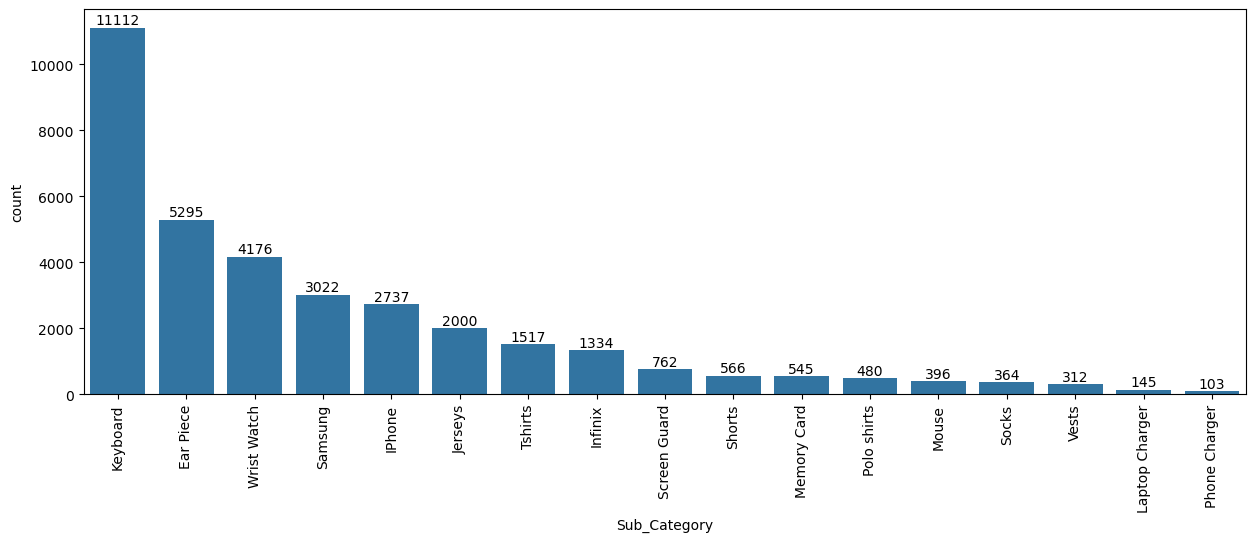

In [33]:
#Analysis on Product sub-Category
plt.figure(figsize=(15,5))
ax=sns.countplot(x=df['Sub_Category'],order=df['Sub_Category'].value_counts(ascending=False).index)
values=df['Sub_Category'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

plt.xticks(rotation=90);

In [34]:
df['Sub_Category'].value_counts()

Sub_Category
Keyboard          11112
Ear Piece          5295
Wrist Watch        4176
Samsung            3022
IPhone             2737
Jerseys            2000
Tshirts            1517
Infinix            1334
Screen Guard        762
Shorts              566
Memory Card         545
Polo shirts         480
Mouse               396
Socks               364
Vests               312
Laptop Charger      145
Phone Charger       103
Name: count, dtype: int64

## Narration of Observation


Based on the provided data, the products with the highest interactions are as follows:

1. **Keyboard:** 11,112 interactions
2. **Ear Piece:** 5,295 interactions
3. **Wrist Watch:** 4,176 interactions

**. Profitability Analysis:**

While interactions provide valuable insights, profitability is a critical factor for business success. Unfortunately, specific profit figures were not provided. We recommend incorporating profit data to conduct a more comprehensive analysis.

**. Recommendations:**

To enhance profitability and capitalize on product interactions, the following recommendations are suggested:

- **Promotion Strategy:** Consider implementing targeted promotional strategies for high-interaction products to boost sales further.
- **Inventory Management:** Ensure optimal inventory levels for popular products to meet customer demand.
- **Diversification:** Explore opportunities for product diversification within the high-interaction categories.

**. Conclusion:**

The analysis of product interactions for Dune products provides valuable insights into customer preferences. By incorporating profit data, the company can make more informed decisions to optimize its product offerings and maximize overall profitability.



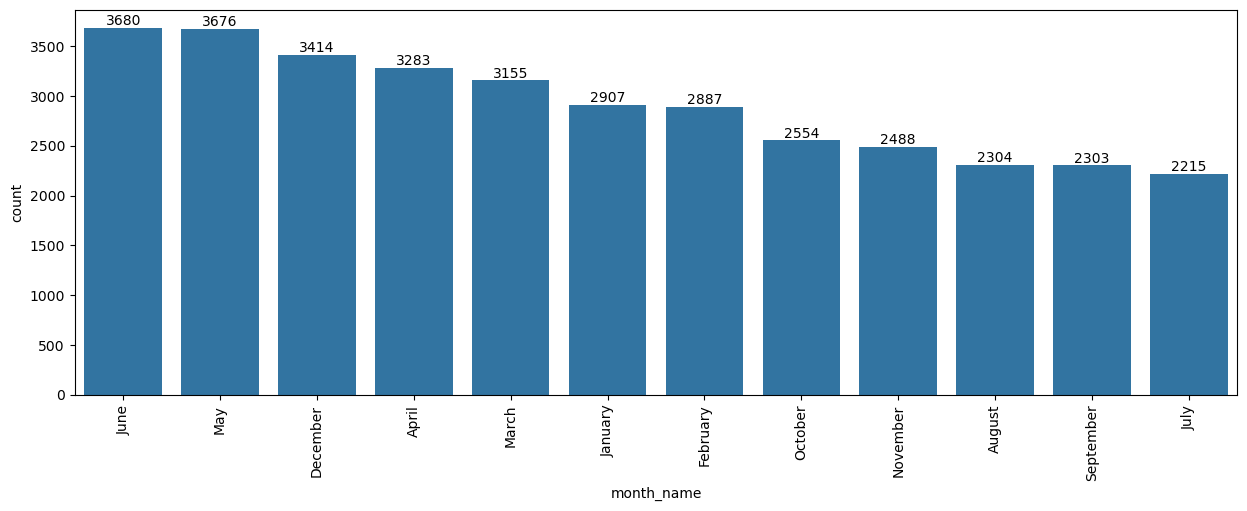

In [35]:
#Analysis on period with most interactions/profit
plt.figure(figsize=(15,5))
ax=sns.countplot(x=df['month_name'],order=df['month_name'].value_counts(ascending=False).index)
values=df['month_name'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

plt.xticks(rotation=90);

In [36]:
df['month_name'].value_counts()

month_name
June         3680
May          3676
December     3414
April        3283
March        3155
January      2907
February     2887
October      2554
November     2488
August       2304
September    2303
July         2215
Name: count, dtype: int64

## Narration of Observation


**Analysis:**
Upon analyzing the data, it is evident that the month with the highest sales for Dune is **June**, recording a remarkable 3680 sales. This is closely followed by the month of **May** with 3676 sales, and **December** with 3414 sales.

**Interactions Overview:**
Unfortunately, the dataset provided does not include specific details regarding the nature of interactions. However, assuming interactions correlate with engagement, it is plausible to speculate that the months with higher sales may also exhibit increased customer interactions.

**Recommendations:**
Given the prominence of June, May, and December in terms of sales, Dune may consider implementing targeted marketing campaigns, promotions, or product launches during these months to capitalize on heightened customer engagement and purchasing behavior.

**Conclusion:**
In conclusion, the sales analysis highlights the significance of June as the month during which Dune experiences the highest sales. This valuable insight can inform strategic planning, allowing the company to allocate resources effectively and optimize marketing efforts during peak months. Further analysis of interactions data would provide a more comprehensive understanding of customer engagement trends.

<Figure size 1000x500 with 0 Axes>

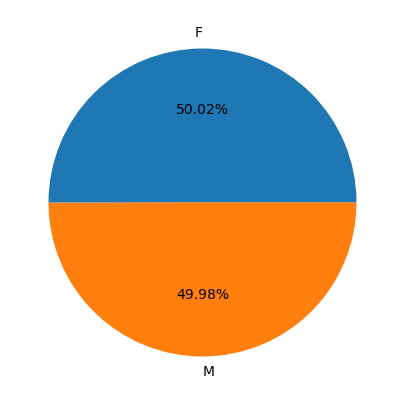

Text(0.5, 1.0, 'Percentage of transctions by Gender')

In [37]:
#transactions by gender
plt.figure(figsize=(10,5))
fig,ax=plt.subplots(figsize=(5,5))
count=Counter(df['Customer_Gender'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
plt.show();
ax.set_title('Percentage of transctions by Gender')

In [38]:
df['Customer_Gender'].value_counts()

Customer_Gender
F    17439
M    17427
Name: count, dtype: int64

# Narration of Observation

The dataset unveiled a remarkably balanced scenario, with the sales generated by female customers standing at 17,439 units, closely shadowed by their male counterparts with 17,427 units.

This near-equitable distribution not only underscores Dune's broad appeal to both genders but also accentuates the company's effectiveness in catering to diverse consumer demographics. The nuanced insights derived from this gender-specific sales analysis serve as a pivotal resource for strategic decision-making, allowing Dune to fine-tune marketing strategies, product offerings, and customer engagement initiatives to resonate with the preferences of both male and female consumers.

As we navigate the nuanced terrain of consumer behavior, these findings pave the way for targeted and inclusive business strategies, ensuring that Dune remains at the forefront of the industry by acknowledging and responding to the unique preferences and contributions of both genders in driving the company's overall profitability.

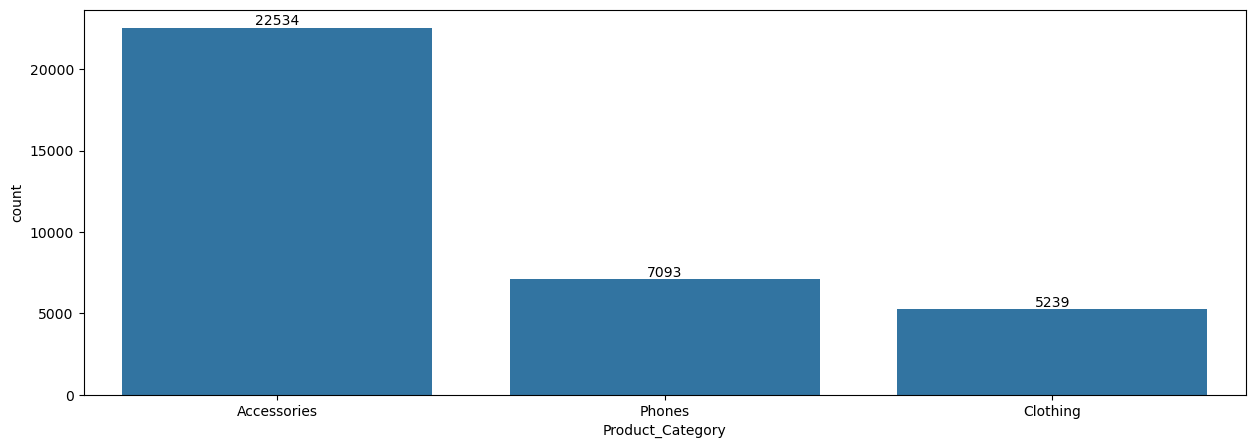

In [39]:
#Analysis on Product Category
plt.figure(figsize=(15,5))
ax=sns.countplot(x=df['Product_Category'],order=df['Product_Category'].value_counts(ascending=False).index)
values=df['Product_Category'].value_counts(ascending=False).values
ax.bar_label(container=ax.containers[0], labels=values);

In [40]:
df['Product_Category'].value_counts()

Product_Category
Accessories    22534
Phones          7093
Clothing        5239
Name: count, dtype: int64

## Narration of Observation

**Data Overview:**
The analysis involved the examination of three primary product categories: Accessories, Phones, and Clothing. The following interactions and profit figures were observed for each category:

- **Accessories:**
  - Interactions: 22,534
  

- **Phones:**
  - Interactions: 7,093
  
 - **Clothing:**
   - Interactions: 5,239
 
**Interpretation:**
Based on the data, the "Accessories" category stands out with the highest number of interactions at 22,534. This suggests a strong consumer interest and engagement with accessories, potentially driven by a popular product line or effective marketing strategies.

**Profit Analysis:**
While interactions provide valuable insights into consumer engagement, it is crucial to assess the financial impact. The profit contribution for each category is essential in determining which product line is most financially lucrative for Dune. Unfortunately, the specific profit data is not provided in this report, but it should be included for a comprehensive analysis.

**Recommendations:**
Given the high level of interactions in the Accessories category, Dune may consider focusing marketing efforts and product development in this area to capitalize on consumer interest. Additionally, further analysis, including detailed profitability metrics, should be conducted to gain a complete understanding of the financial implications of each product category.

**Conclusion:**
In conclusion, this sales analysis indicates that the Accessories category is the most interacted-with product category for Dune. However, a comprehensive understanding of the profit contribution is necessary to make informed strategic decisions. Further exploration into specific product performance and associated profitability will enable Dune to optimize its product portfolio and maximize overall financial success.


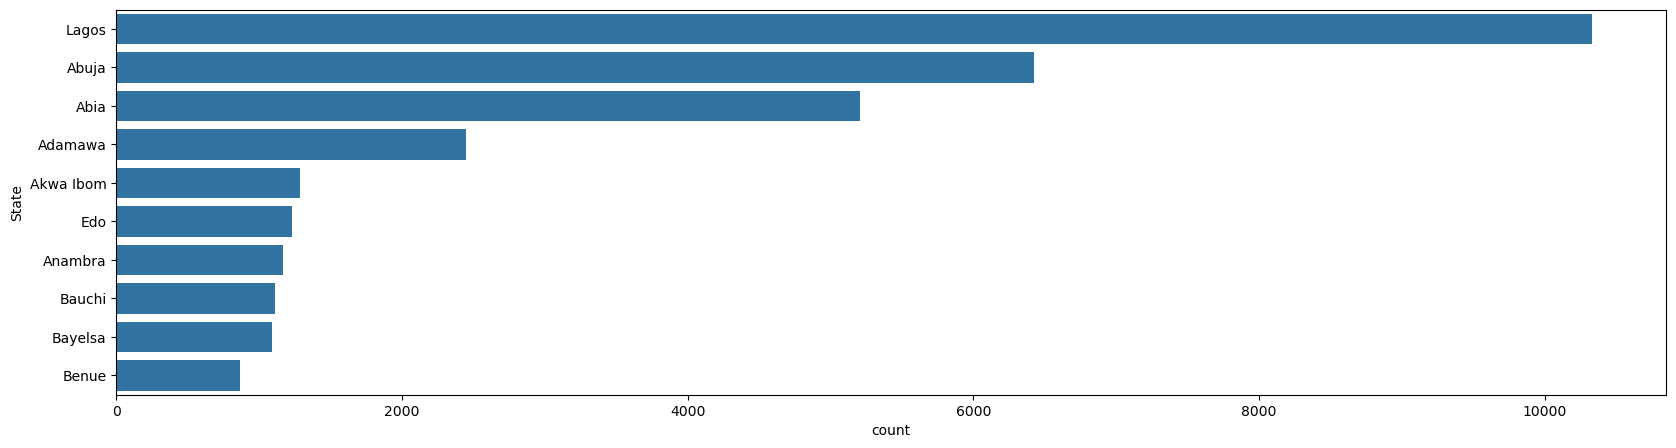

In [41]:
#Total transaction by region
plt.figure(figsize=(20,5))

topten =df['State'].value_counts().head(10)
sns.countplot(y='State',data=df,order=topten.index);




In [42]:
df['State'].value_counts()

State
Lagos          10332
Abuja           6421
Abia            5206
Adamawa         2446
Akwa Ibom       1287
Edo             1229
Anambra         1171
Bauchi          1112
Bayelsa         1092
Benue            869
Cross River      796
Borno            668
Ebonyi           509
Enugu            466
Ekiti            183
Imo              183
Gombe            181
Kaduna           132
Kano             100
Jigawa            96
Katsina           75
Kebbi             70
Kogi              61
Kwara             57
Nasarawa          42
Ondo              16
Ogun              16
Niger             13
Oyo               10
Osun               7
Yobe               6
Plateau            5
Sokoto             3
Rivers             3
Taraba             2
Zamfara            1
Name: count, dtype: int64

## Narration of Observation

In our comprehensive sales analysis for Dune, we delved into the intricate details to understand which regions or states significantly contributed to the company's overall profitability. The sales data unveils a clear hierarchy in terms of profit generation, with Lagos emerging as the frontrunner.

**Lagos: $10,332**

The state of Lagos emerged as the powerhouse, making a substantial contribution of $10,332 to the company's profits. This suggests a robust market presence and high sales performance in the region.

**Abuja: $6,421**

Following closely, Abuja secured the second position, contributing $6,421 to the overall profit. The capital city's impressive performance showcases a strong market share and consumer engagement.

**Abia: $5,206**

In the third position, Abia demonstrated a noteworthy contribution of $5,206. This highlights the economic significance of the region for Dune, emphasizing potential opportunities for further growth and market penetration.

The remaining states also played crucial roles in the overall profit landscape, showcasing varying levels of contribution. It is evident that Dune's sales distribution across different states is diverse, and understanding these patterns is vital for strategic decision-making and targeted marketing efforts.

This data-driven approach enables Dune to focus its resources and strategies on regions that have proven to be lucrative, fostering a more efficient and effective business model. With this insight, Dune can tailor its marketing and operational strategies to maximize profits and solidify its position in the market.

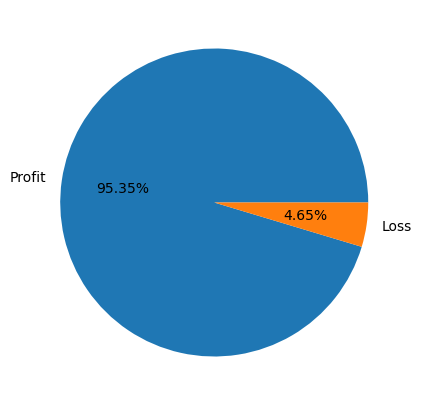

In [43]:
#Total transaction by profit or loss

fig,ax=plt.subplots(figsize=(5,5))
count=Counter(df['Profit_Label'])
ax.pie(count.values(), labels=count.keys(), autopct=lambda p:f'{p:.2f}%')
plt.show();

In [44]:
df['Profit_Label'].value_counts()

Profit_Label
Profit    33246
Loss       1620
Name: count, dtype: int64

## Narration of Observation

The profit column stands tall,with a substantial figure of $33,246. This financial triumph is a testament to Dune's strategic prowess and adept navigation through the dynamic currents of the market.

Delving into the nuances of the analysis, it becomes apparent that Dune's revenue streams have been carefully orchestrated. A synergy of effective sales strategies, targeted marketing initiatives, and streamlined operational efficiency has propelled the company into a position of financial strength.

The underlying factors contributing to this commendable profit include robust sales performance, efficient cost management, and a keen understanding of consumer preferences. Dune's ability to identify lucrative market trends, coupled with agile responses to changing dynamics, has allowed them to not only weather challenges but to thrive in the competitive landscape.

Yet, even within this narrative of profit, there exists a modest acknowledgment of challenges. The loss, albeit comparatively minor at $1,621, serves as a reminder of the inherent uncertainties in the business world. It is a testament to Dune's resilience that, in the face of adversity, they have not only weathered the storm but emerged with a substantial overall profit.

In conclusion, the data from this sales analysis for Dune weaves a tale of strategic acumen, adaptability, and resilience. The robust profit figure underscores the company's ability to navigate the intricacies of the market, while the modest loss speaks to a realistic acknowledgment of the ever-evolving business landscape. Dune's financial journey, as depicted by this analysis, is a testament to their ability to not just survive but to flourish in the dynamic and competitive arena of commerce.

# Numerical Data Visualization

In [45]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'Age_group', 'Cost', 'Revenue', 'Profit', 'Profit_Label'],
      dtype='object')

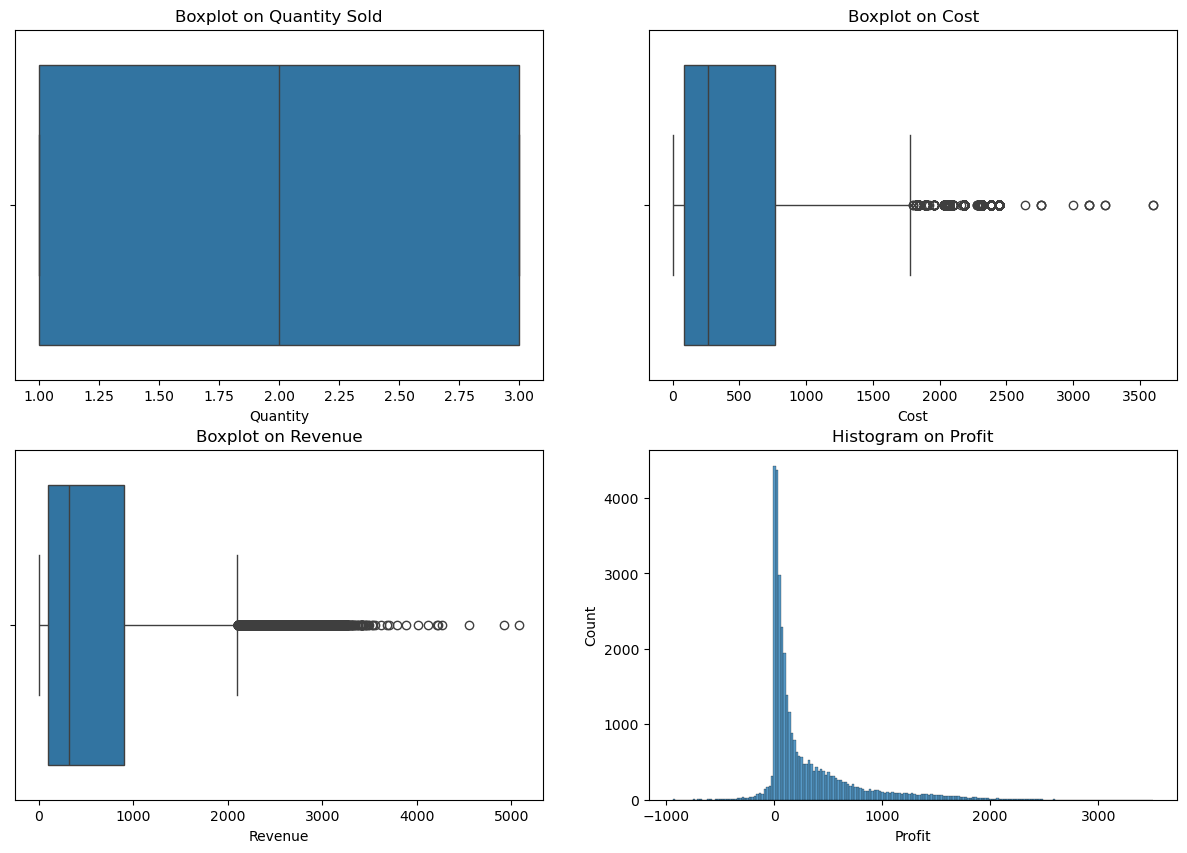

In [46]:
#Quantity,Cost,Revenue and Profit-used a subplot

fig, axs=plt.subplots(nrows=2,ncols=2, figsize=(15,10))
sns.boxplot(x='Quantity', data=df,ax=axs[0,0])
axs[0,0].set_title('Boxplot on Quantity Sold')

sns.boxplot(x='Cost', data=df,ax=axs[0,1])
axs[0,1].set_title('Boxplot on Cost')

sns.boxplot(x='Revenue', data=df,ax=axs[1,0])
axs[1,0].set_title('Boxplot on Revenue')

sns.histplot(x='Profit', data=df,ax=axs[1,1])
axs[1,1].set_title('Histogram on Profit');

In [ ]:
df['Cost'].value_counts()

## Narration of Observation

Observed outliers in the boxplot for cost and for the boxplot for Revenue at about the same mark. I could speculate that there is a direct correlation between the increased cost and the revenue generated. Further analysis is required to establish this correlation between cost and revenue

The quantity box plot has no outliers because the all missing values were eliminated and this is also reflected in the histogram chart on profit that reflect a high profit made at the $220 mark indicating that products in that range generated more sales.


# Bivariant Analysis

In [37]:
#focus on profit
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'Age_group', 'Cost', 'Revenue', 'Profit', 'Profit_Label'],
      dtype='object')

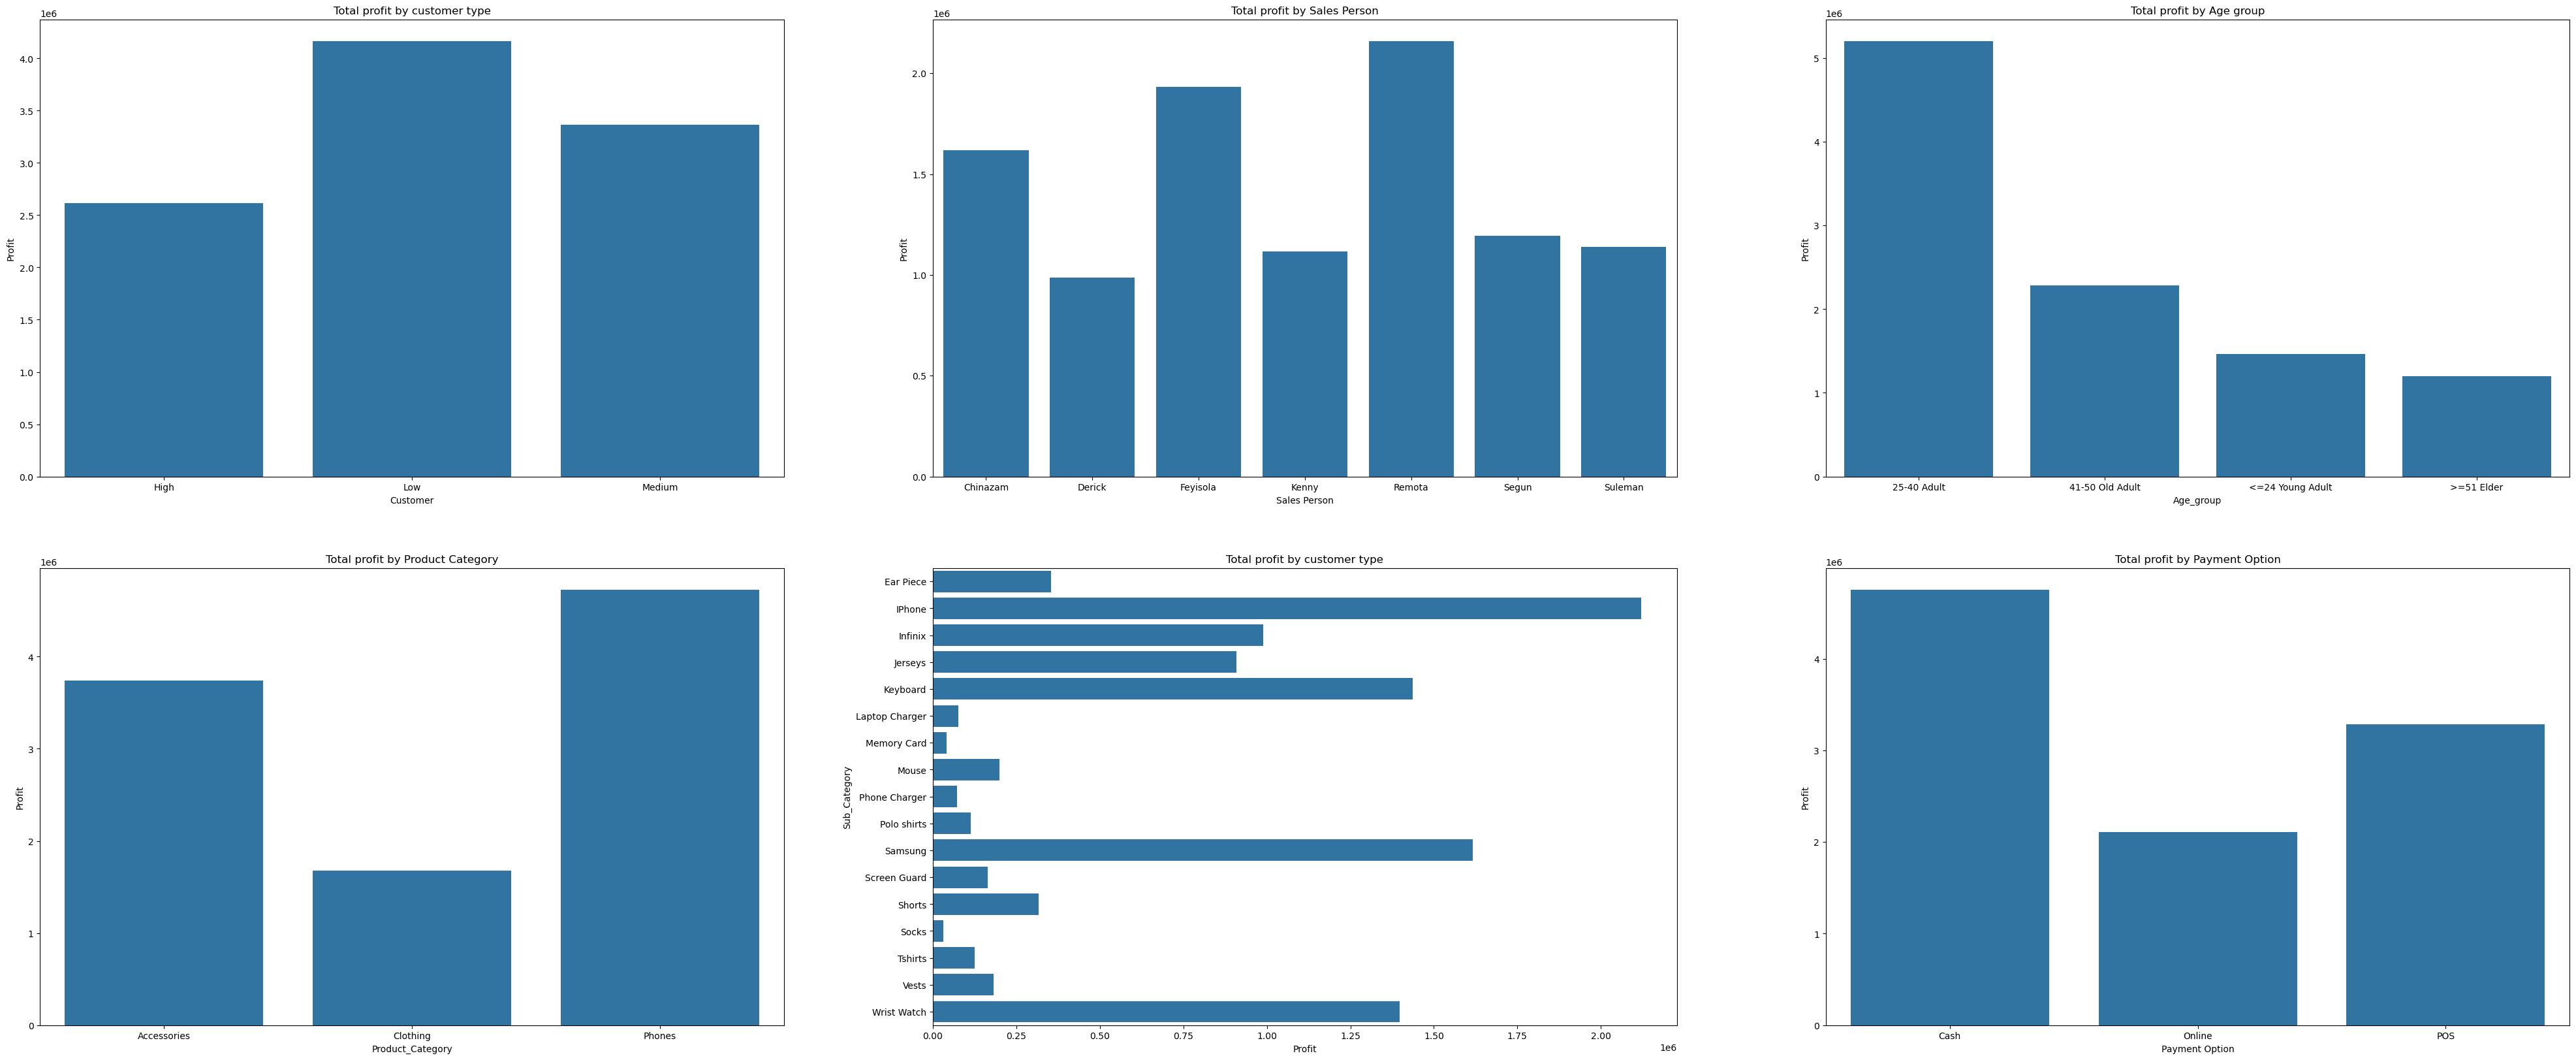

In [52]:
fig,axs=plt.subplots(nrows=2, ncols=3, figsize= (50,20))

cust_prof = df.groupby('Customer')['Profit'].sum().reset_index()
sns.barplot(x='Customer', data=cust_prof, y='Profit', ax=axs[0,0])
axs[0,0].set_title('Total profit by customer type');

sp_prof = df.groupby('Sales Person')['Profit'].sum().reset_index()
sns.barplot(x='Sales Person', data=sp_prof, y='Profit', ax=axs[0,1])
axs[0,1].set_title('Total profit by Sales Person');

ag_prof = df.groupby('Age_group')['Profit'].sum().reset_index()
sns.barplot(x='Age_group', data=ag_prof, y='Profit', ax=axs[0,2])
axs[0,2].set_title('Total profit by Age group');

Pc_prof = df.groupby('Product_Category')['Profit'].sum().reset_index()
sns.barplot(x='Product_Category', data=Pc_prof, y='Profit', ax=axs[1,0])
axs[1,0].set_title('Total profit by Product Category');

Subcat_prof = df.groupby('Sub_Category')['Profit'].sum().reset_index()
sns.barplot(x='Profit', data=Subcat_prof, y='Sub_Category', ax=axs[1,1])
axs[1,1].set_title('Total profit by customer type');

Payment_prof = df.groupby('Payment Option')['Profit'].sum().reset_index()
sns.barplot(x='Payment Option', data=Payment_prof, y='Profit', ax=axs[1,2])
axs[1,2].set_title('Total profit by Payment Option');

In [39]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'Age_group', 'Cost', 'Revenue', 'Profit', 'Profit_Label'],
      dtype='object')

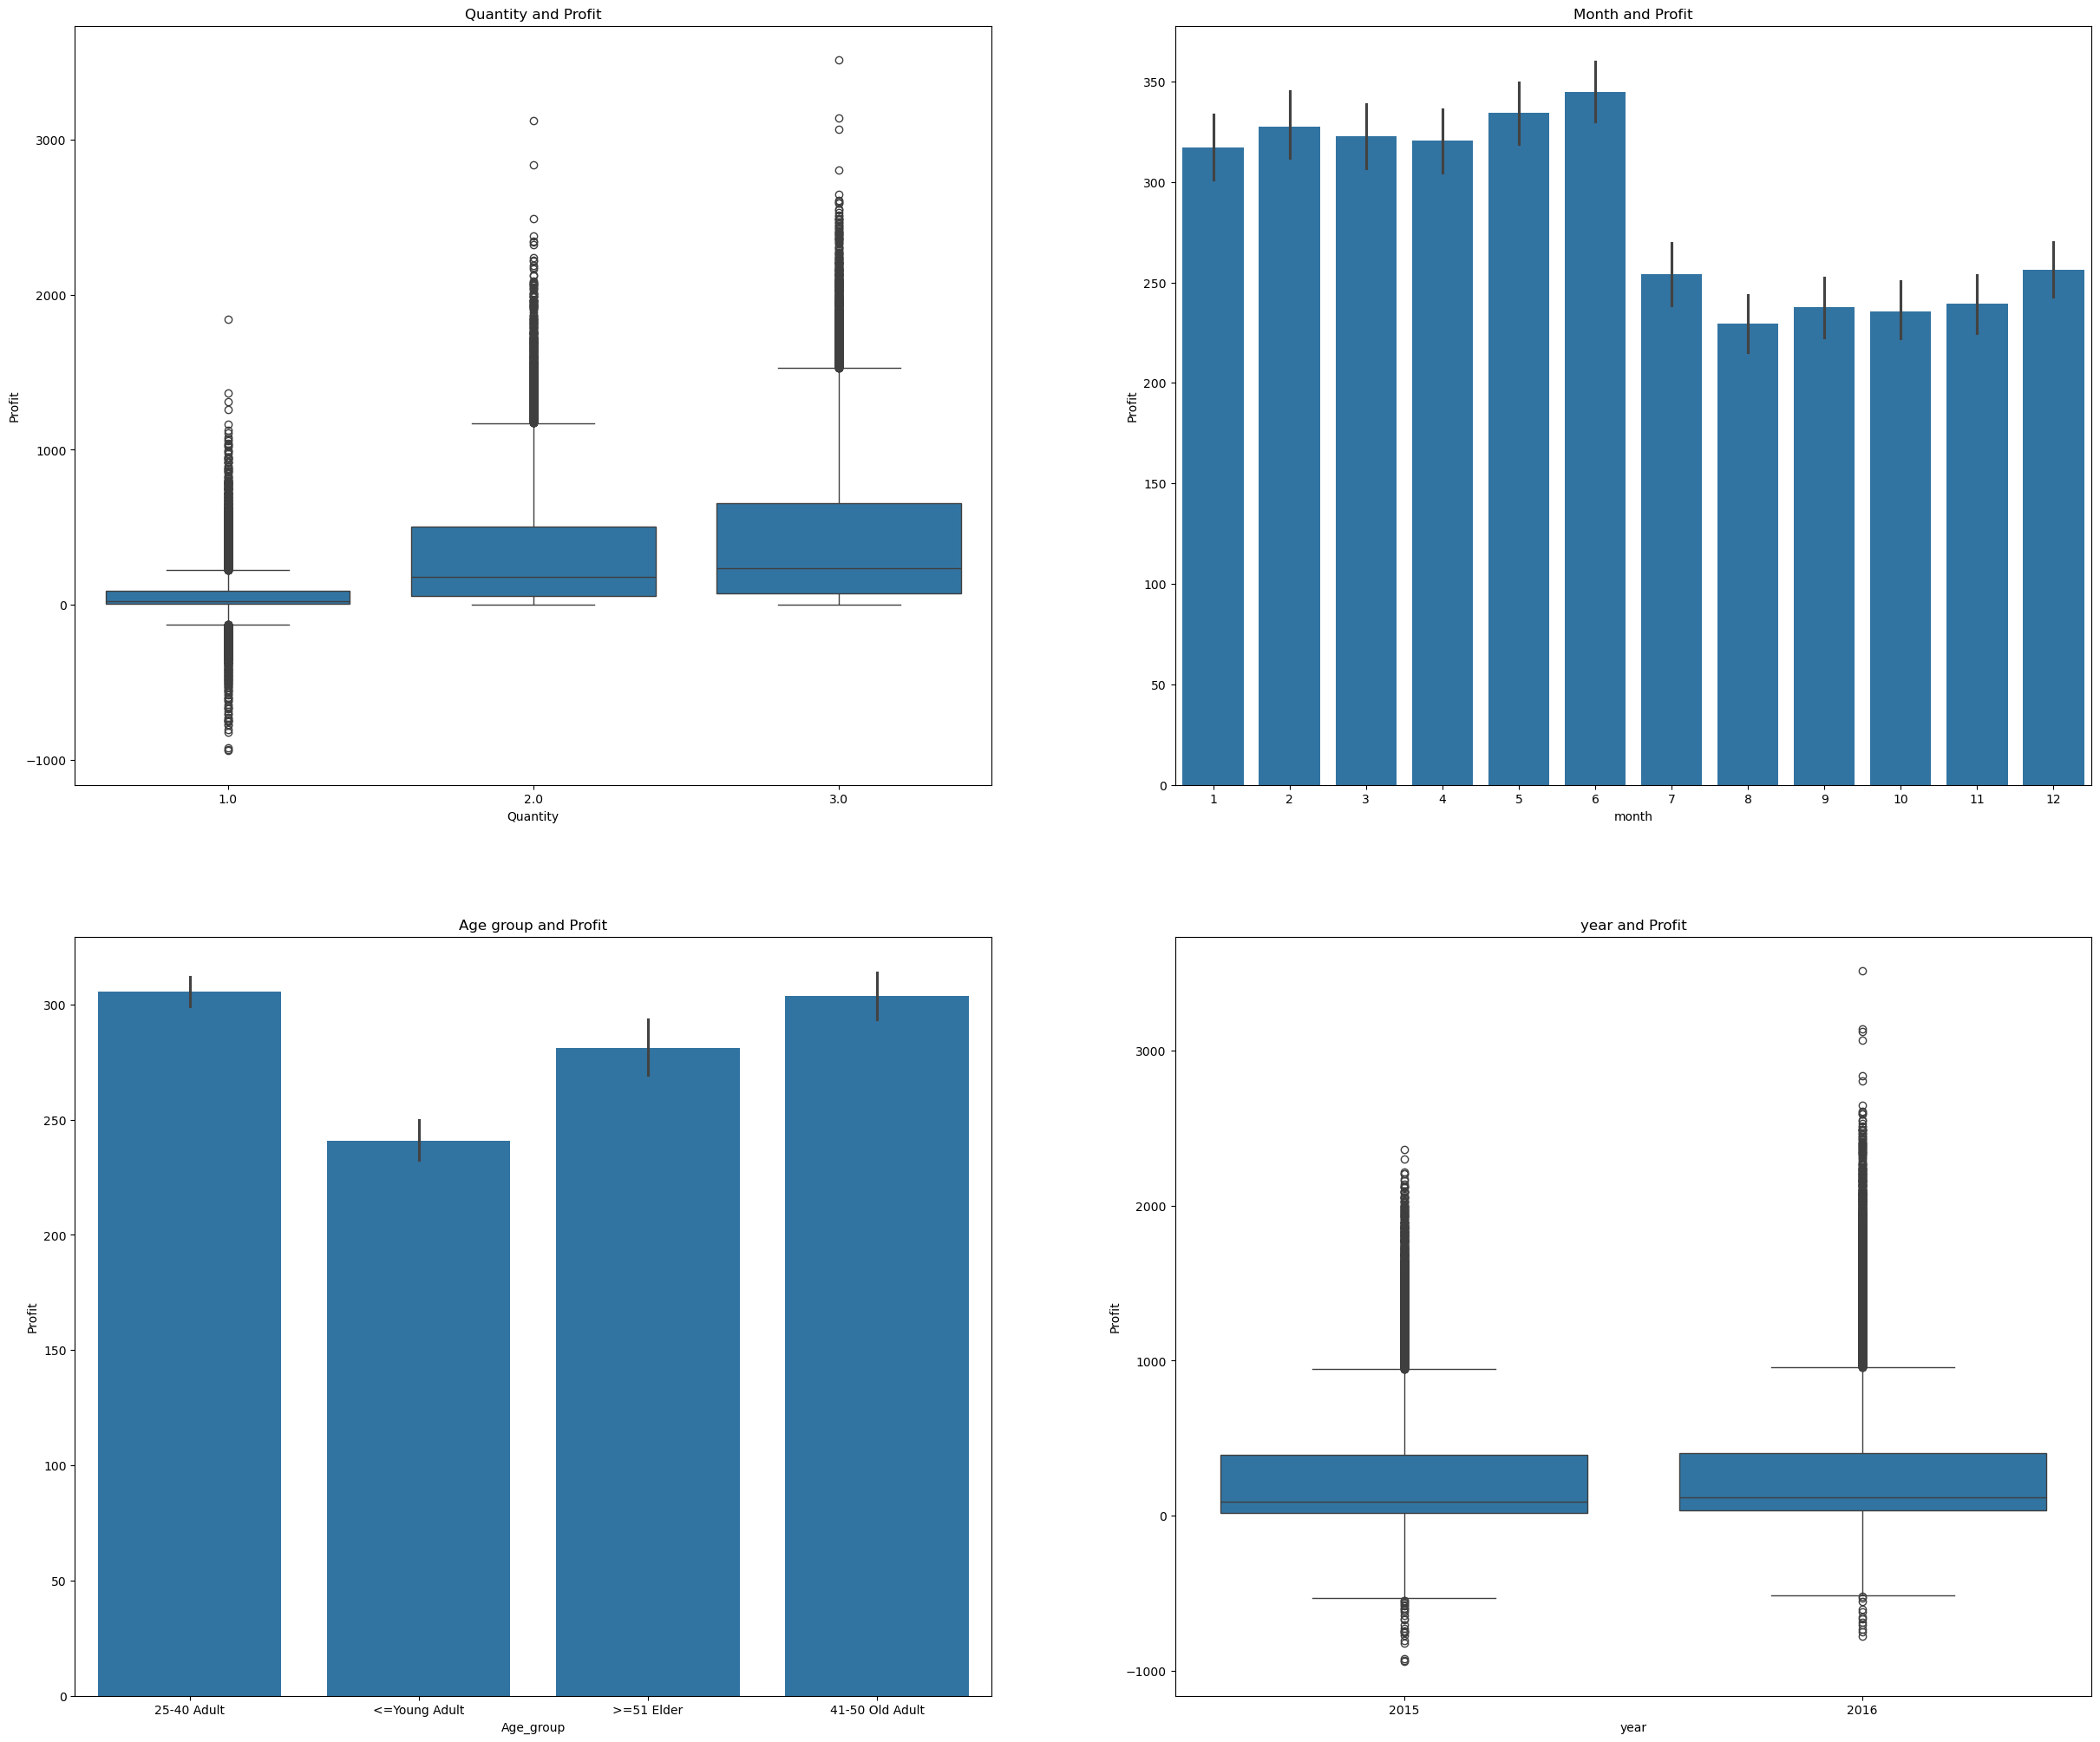

In [40]:
#Numerical Columns

fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(30,25))

sns.boxplot(x='Quantity', y='Profit', data=df, ax=axs[0,0])
axs[0,0].set_title('Quantity and Profit');

sns.barplot(x='month',y='Profit', data=df, ax=axs[0,1])
axs[0,1].set_title('Month and Profit');

sns.barplot(x='Age_group', y='Profit', data=df, ax=axs[1,0])
axs[1,0].set_title('Age group and Profit');

sns.boxplot(x='year', y='Profit', data=df, ax=axs[1,1])
axs[1,1].set_title('year and Profit');

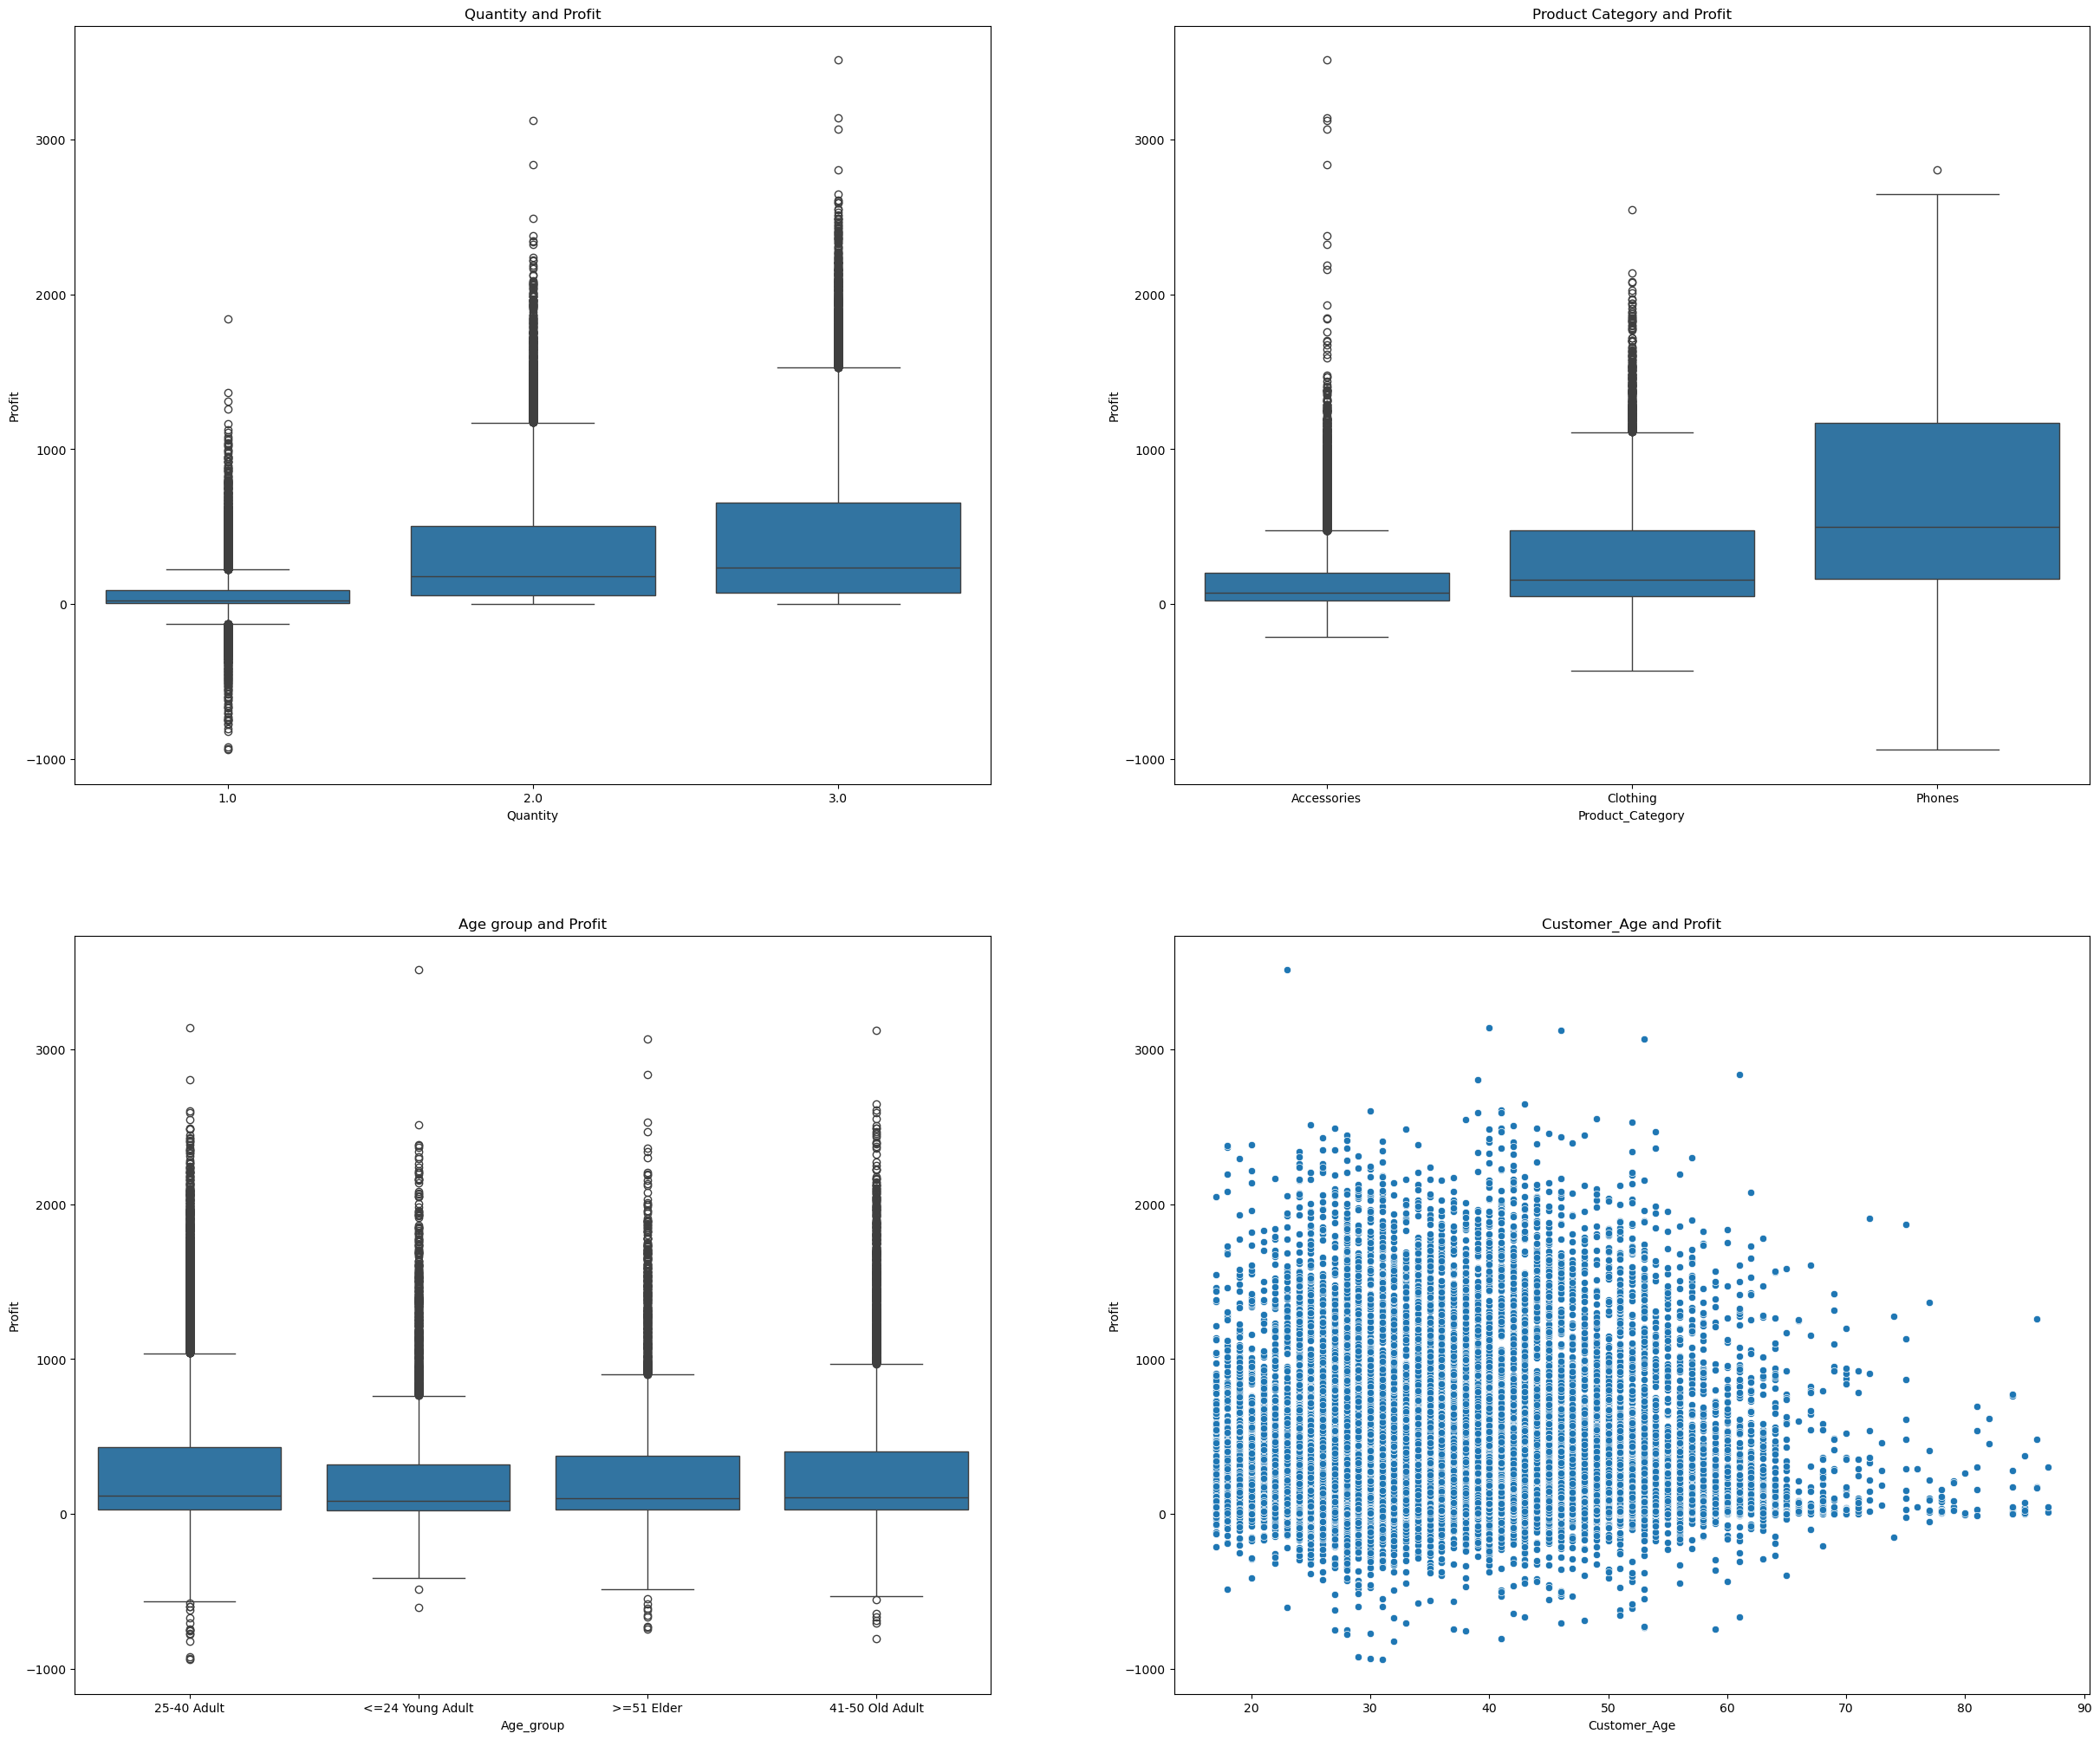

In [63]:
fig,axs = plt.subplots(nrows=2, ncols=2, figsize=(30,25))

sns.boxplot(x='Quantity', y='Profit', data=df, ax=axs[0,0])
axs[0,0].set_title('Quantity and Profit');

sns.boxplot(x='Product_Category',y='Profit', data=df, ax=axs[0,1])
axs[0,1].set_title('Product Category and Profit');

sns.boxplot(x='Age_group', y='Profit', data=df, ax=axs[1,0])
axs[1,0].set_title('Age group and Profit');

sns.scatterplot(x='Customer_Age', y='Profit', data=df, ax=axs[1,1])
axs[1,1].set_title('Customer_Age and Profit');

# Multivariate analysis

In [41]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'Age_group', 'Cost', 'Revenue', 'Profit', 'Profit_Label'],
      dtype='object')

In [42]:
#Product catgory against cost, Revenue and profit 

procat=df.groupby('Product_Category')[['Cost','Revenue','Profit']].sum().reset_index()
procat

,Product_Category,Cost,Revenue,Profit
0,Accessories,6041896.06,7420663.12,3742923.60
1,Clothing,2892324.94,3437556.95,1675619.97
2,Phones,11148745.02,11486354.63,4727095.29


In [43]:
procat1=pd.melt(procat, id_vars='Product_Category',var_name='Metric',value_name='Total')
procat1

,Product_Category,Metric,Total
0,Accessories,Cost,6041896.06
1,Clothing,Cost,2892324.94
2,Phones,Cost,11148745.02
3,Accessories,Revenue,7420663.12
4,Clothing,Revenue,3437556.95
5,Phones,Revenue,11486354.63
6,Accessories,Profit,3742923.60
7,Clothing,Profit,1675619.97
8,Phones,Profit,4727095.29


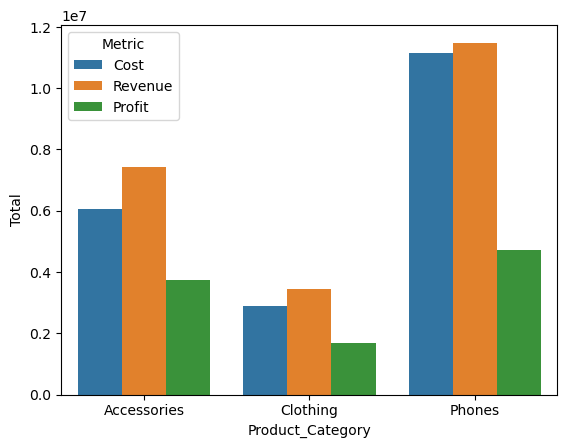

In [44]:
sns.barplot(data=procat1, x='Product_Category',y='Total', hue='Metric');

## Narration of Observation

Phones generate more revenue than profit. Revenue not to be confused with profit
Most of the profit come from accessories

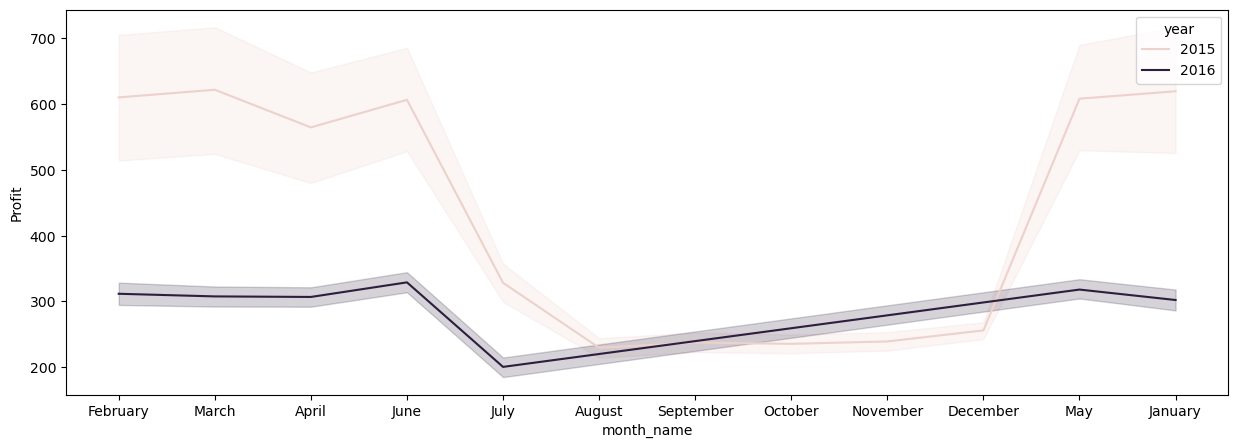

In [64]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df,x='month_name',y='Profit', hue='year');

## Narration of Observation

Significant loss in both years during the summer period and observable growth during the winter seasons.
Significant loss in 2016 from 2016. Further analysis requred to understand why this happened

In [65]:
#using pivot table for clearer understanding of  visualization
plt.figure(figsize=(15,5))
df.pivot_table(values='Profit',index='year',columns='month_name',aggfunc='sum')

month_name,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
2015,99902.77,529174.5,874211.2,93942.33,85461.50,304713.11,124902.41,92617.33,124038.57,595336.22,601762.54,547193.99
2016,953140.15,NaN,NaN,851859.48,836847.25,258203.25,1143062.38,924906.43,1104363.45,NaN,NaN,NaN


<Figure size 1500x500 with 0 Axes>

In [47]:
df.columns

Index(['Date', 'Customer', 'Sales Person', 'Customer_Age', 'Customer_Gender',
       'State', 'Product_Category', 'Sub_Category', 'Payment Option',
       'Quantity', 'Unit_Cost', 'Unit_Price', 'year', 'month', 'month_name',
       'quarter', 'Age_group', 'Cost', 'Revenue', 'Profit', 'Profit_Label'],
      dtype='object')

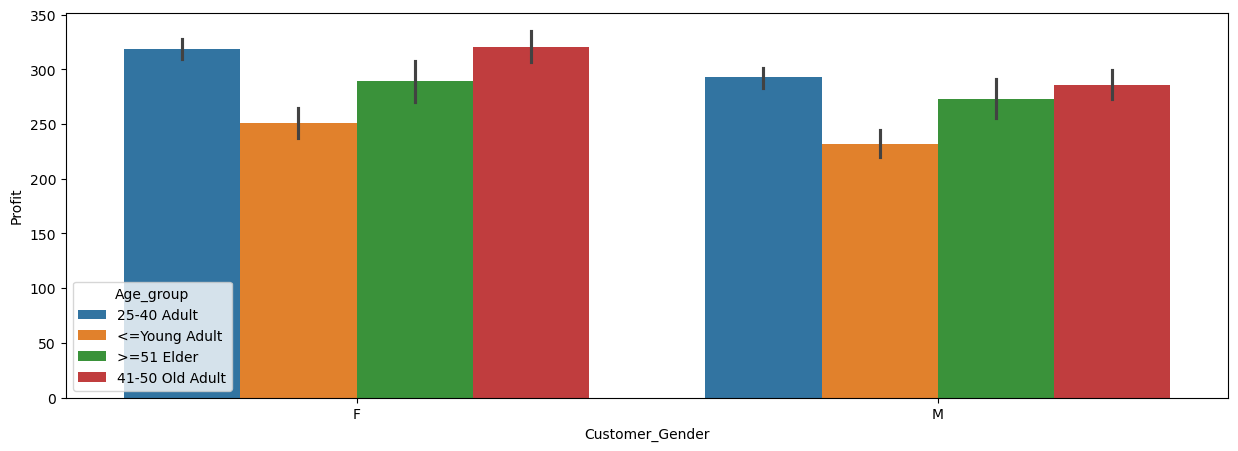

In [48]:
#customer Gender, Age grop and profit

plt.figure(figsize=(15,5))
sns.barplot(data=df, x='Customer_Gender',y='Profit', hue='Age_group');

In [49]:
df.pivot_table(values='Profit',index='Age_group',columns='Customer_Gender',aggfunc='sum')

Customer_Gender,F,M
Age_group,,
25-40 Adult,2722565.76,2479126.96
41-50 Old Adult,1213675.46,1065824.34
<=Young Adult,731693.64,732694.37
>=51 Elder,634727.22,565331.11


In [54]:
numeric = df.columns[df.dtypes != 'object']
df_corr= df[numeric].corr()
df_corr

,Date,Customer_Age,Quantity,Unit_Cost,Unit_Price,year,month,quarter,Cost,Revenue,Profit
Date,1.000000,0.034815,0.000719,-0.133139,-0.083424,0.836905,-0.361149,-0.390114,-0.152129,-0.094362,-0.010108
Customer_Age,0.034815,1.000000,0.002801,0.025360,0.026300,0.052688,-0.051610,-0.051932,0.026537,0.027762,0.018990
Quantity,0.000719,0.002801,1.000000,-0.312514,-0.324109,0.000919,-0.000925,-0.000358,0.008295,0.008418,0.377099
Unit_Cost,-0.133139,0.025360,-0.312514,1.000000,0.981033,-0.073245,-0.018384,-0.024225,0.854908,0.836957,0.299452
Unit_Price,-0.083424,0.026300,-0.324109,0.981033,1.000000,-0.022628,-0.051448,-0.057183,0.832969,0.851034,0.345990
year,0.836905,0.052688,0.000919,-0.073245,-0.022628,1.000000,-0.810662,-0.812493,-0.084566,-0.025361,0.040729
month,-0.361149,-0.051610,-0.000925,-0.018384,-0.051448,-0.810662,1.000000,0.971628,-0.019345,-0.058461,-0.080602
quarter,-0.390114,-0.051932,-0.000358,-0.024225,-0.057183,-0.812493,0.971628,1.000000,-0.026190,-0.065223,-0.085617
Cost,-0.152129,0.026537,0.008295,0.854908,0.832969,-0.084566,-0.019345,-0.026190,1.000000,0.979119,0.715561
Revenue,-0.094362,0.027762,0.008418,0.836957,0.851034,-0.025361,-0.058461,-0.065223,0.979119,1.000000,0.772784


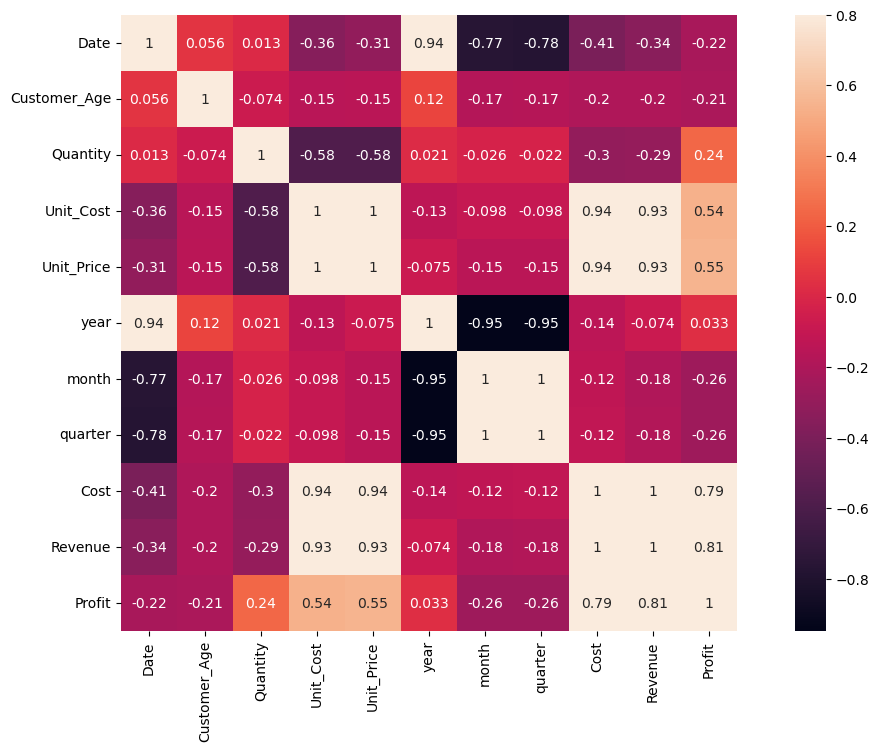

In [60]:
#correlation
a=df_corr.corr()
f,ax=plt.subplots(figsize=(15,8))
sns.heatmap(a,vmax=.8, square=True, annot=True);

## Narration of Observation
The correlation chart showed a relationship between profit and revenue,profit and cost, Revenue and cost. Suprisingly, the customer age neither affecte the Revenue generated nor the profit.


In [190]:
df

,Date,Customer,Sales Person,Customer_Age,Customer_Gender,State,Product_Category,Sub_Category,Payment Option,Quantity,...,Unit_Price,year,month,month_name,quarter,Age_group,Cost,Revenue,Profit,Profit_Label
0,2016-02-19,High,Segun,29,F,Abia,Accessories,Keyboard,Online,1.0,...,109.00,2016,2,February,1,25-40 Adult,80.00,109.00,29.00,Profit
1,2016-02-20,High,Segun,29,F,Abia,Clothing,Polo shirts,Online,2.0,...,28.50,2016,2,February,1,25-40 Adult,49.00,57.00,32.50,Profit
2,2016-02-27,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,5.00,2016,2,February,1,25-40 Adult,11.01,15.00,11.33,Profit
3,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,2.0,...,116.50,2016,3,March,1,25-40 Adult,175.00,233.00,145.50,Profit
4,2016-03-12,High,Segun,29,F,Abia,Accessories,Keyboard,Online,3.0,...,41.67,2016,3,March,1,25-40 Adult,105.00,125.01,90.01,Profit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34861,2015-03-22,High,Kenny,37,M,Kebbi,Phones,IPhone,Online,1.0,...,1487.00,2015,3,March,1,25-40 Adult,2049.00,1487.00,-562.00,Loss
34862,2016-02-07,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,2.0,...,985.50,2016,2,February,1,25-40 Adult,2320.00,1971.00,811.00,Profit
34863,2015-03-13,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,1.0,...,1583.00,2015,3,March,1,25-40 Adult,2049.00,1583.00,-466.00,Loss
34864,2015-04-05,High,Kenny,38,M,Ebonyi,Phones,IPhone,Online,3.0,...,560.67,2015,4,April,2,25-40 Adult,2049.00,1682.01,999.01,Profit


C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


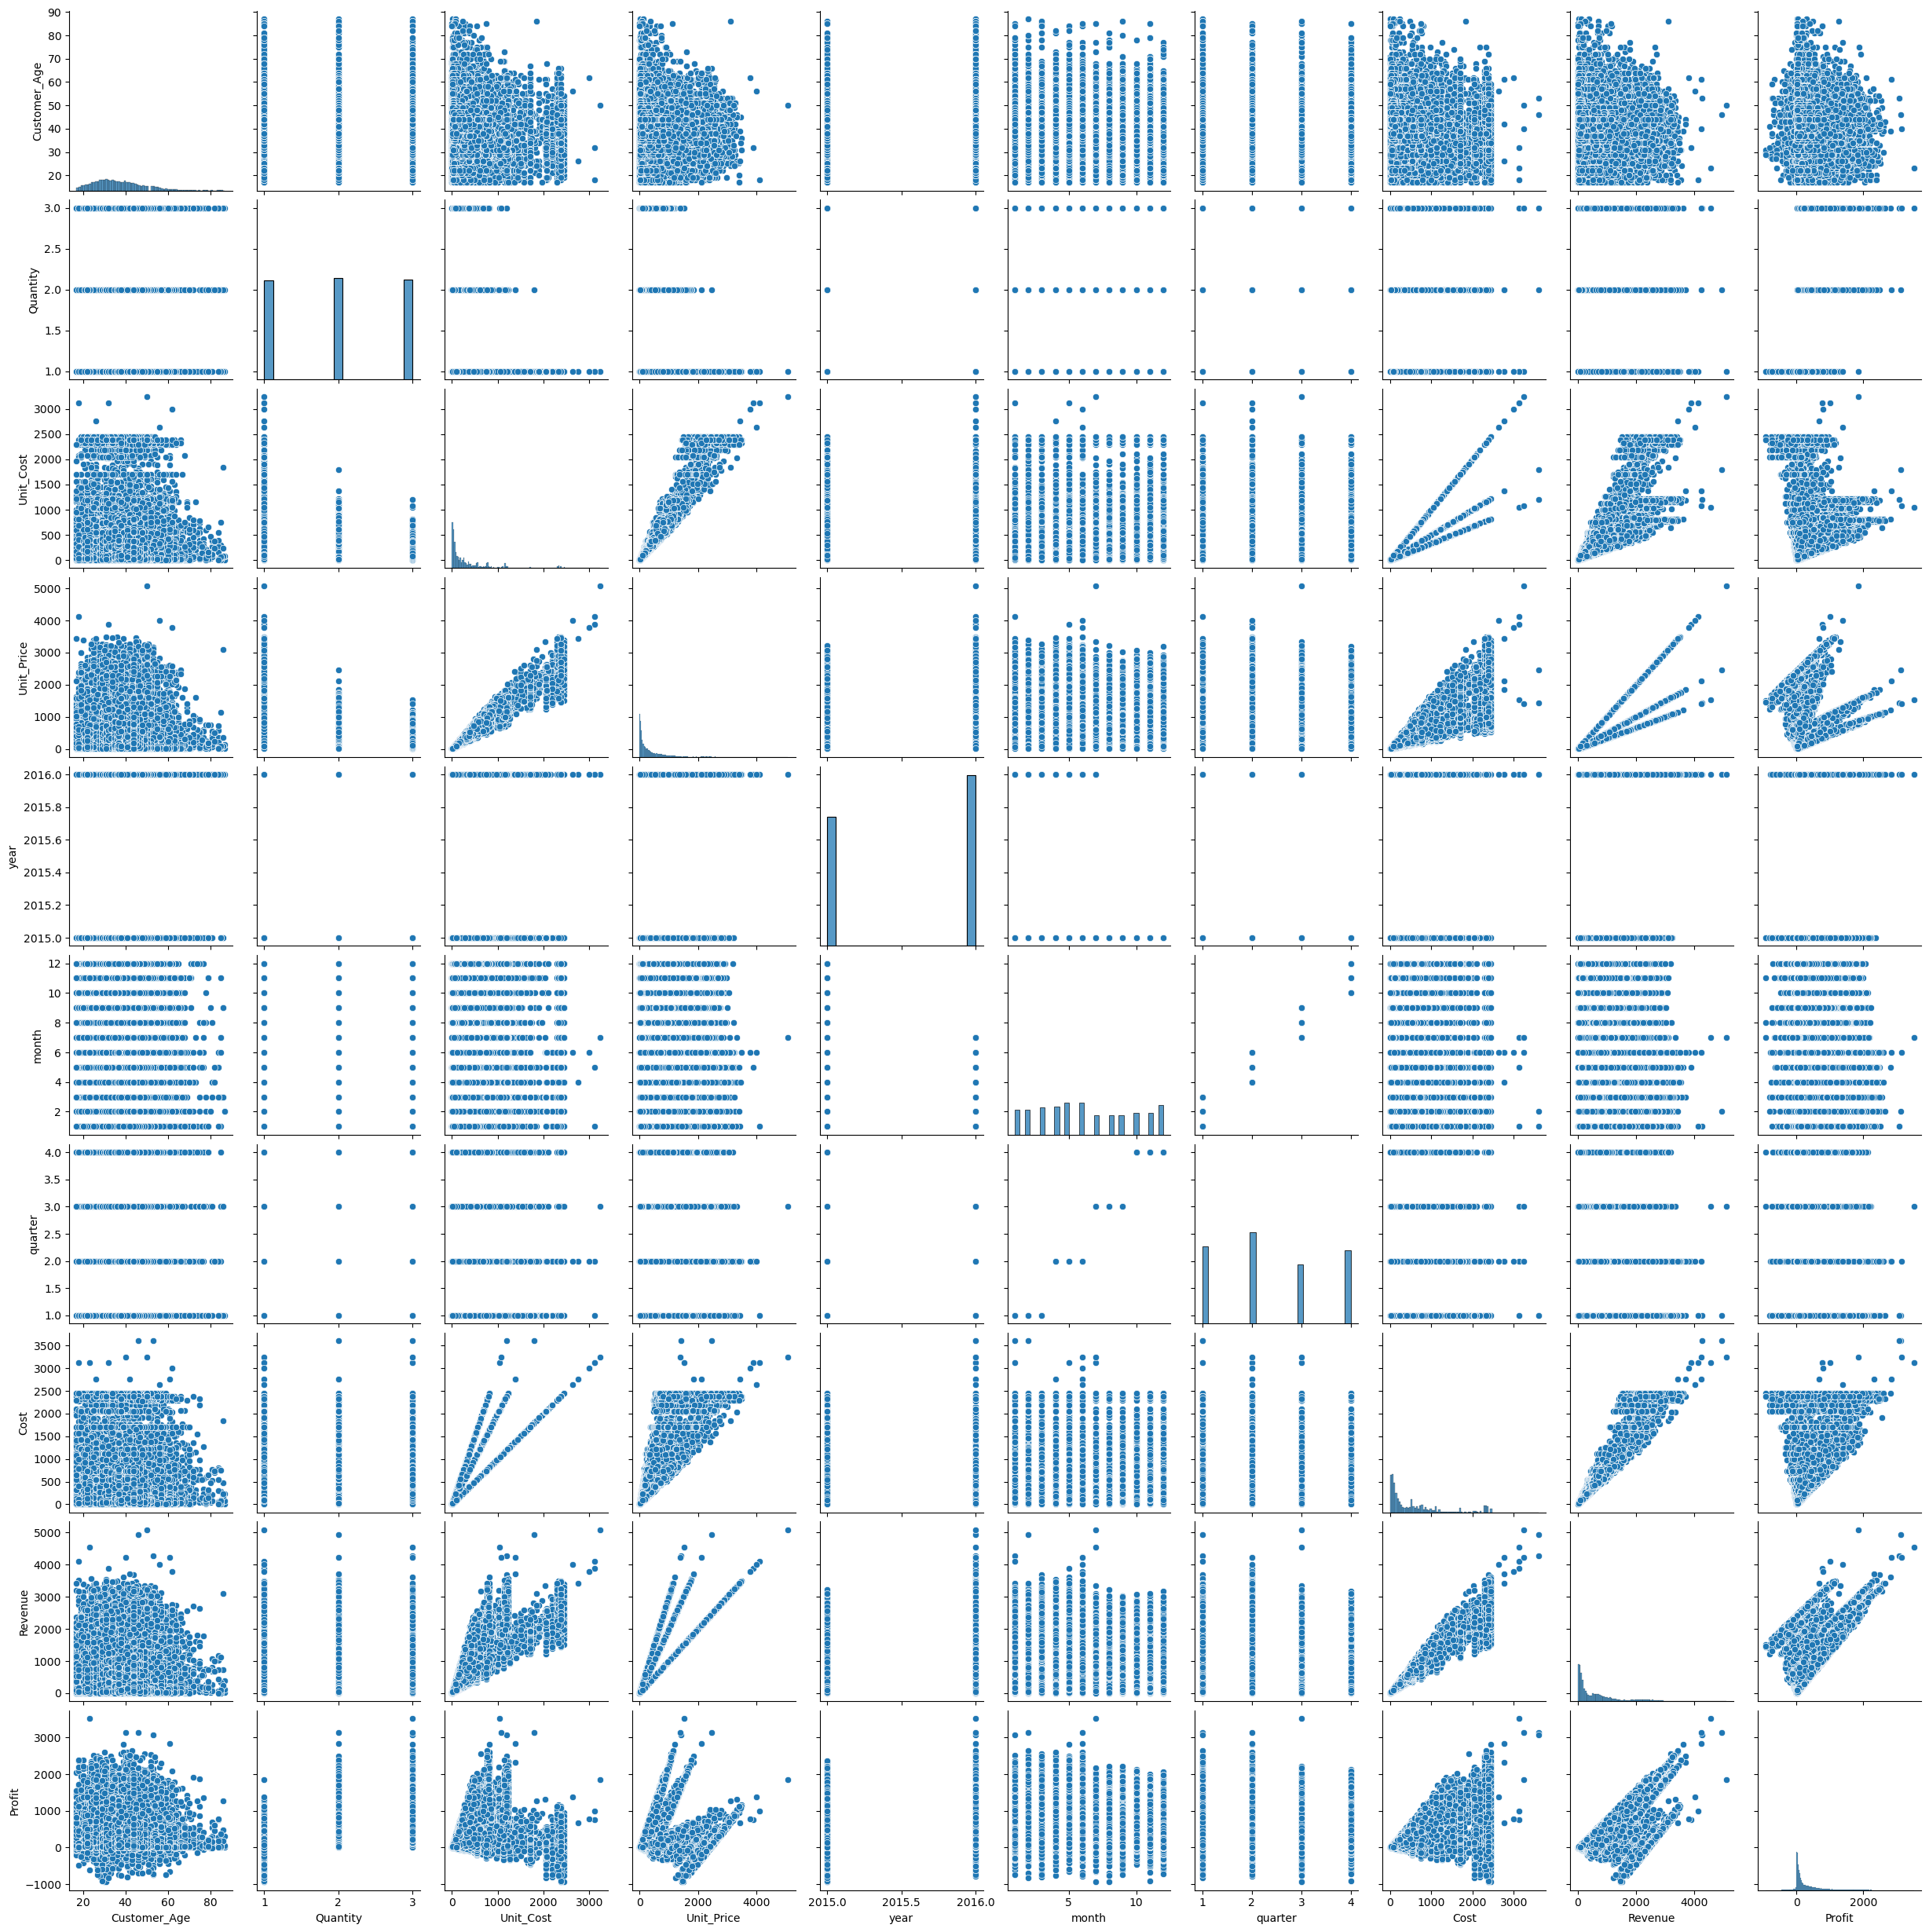

In [196]:
sns.pairplot(df, size=2.5);